### Questão 2

In [162]:
# pip install -U scikit-learn
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data_tae = pd.read_csv('tae.csv', names= ['ta_native','course_instr','course','summer_regular','class_size','label'])
data_tae.head()

,ta_native,course_instr,course,summer_regular,class_size,label
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


[Text(0.5, 0.8333333333333334, 'label <= 2.5\ngini = 0.667\nsamples = 151\nvalue = [50.333, 50.333, 50.333]'),
 Text(0.25, 0.5, 'label <= 1.5\ngini = 0.5\nsamples = 99\nvalue = [50.333, 50.333, 0.0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 49\nvalue = [50.333, 0.0, 0.0]'),
 Text(0.375, 0.16666666666666666, 'gini = -0.0\nsamples = 50\nvalue = [0.0, 50.333, 0.0]'),
 Text(0.75, 0.5, 'ta_native <= 1.5\ngini = 0.0\nsamples = 52\nvalue = [0.0, 0.0, 50.333]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 18\nvalue = [0.0, 0.0, 17.423]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [0.0, 0.0, 32.91]')]

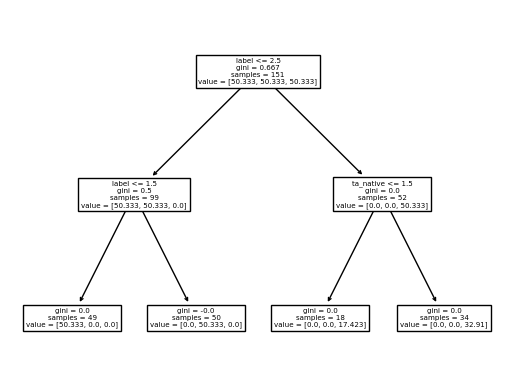

In [163]:
features = ['ta_native','course_instr','course','summer_regular','class_size','label']

x_tae = data_tae[features]
y_tae = data_tae['label']


dtree = DecisionTreeClassifier(class_weight="balanced")
dtree = dtree.fit(x_tae, y_tae)

tree.plot_tree(dtree, feature_names=features)

label: 2.5 ou menos seguem o caminho da esquerda, 2.5 ou mais seguem o caminho da direita.


### Questão 3

In [164]:
data_wine = pd.read_csv('wine.csv', names= ['label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
data_wine.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [165]:
# A coluna ‘label’ representa o atributo meta, ou seja, o objetivo da classificação.
# A coluna ‘Proline’ deve ser descartada para todas as análises
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = data_wine.drop('Proline', axis=1)
y = data_wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [166]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [167]:
clf.predict([[13.2, 2.77, 2.51, 18.5, 96, 1.04, 0.6, 0.06, 1.05, 0.96, 3.35, 3.25, 0.99]])

/home/matheus/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [168]:
# Importa o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [169]:
print(data_wine.columns)
data_wine = data_wine.drop('Proline', axis=1)
feature_imp = pd.Series(clf.feature_importances_,index=data_wine.columns).sort_values(ascending=False)
feature_imp

Index(['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


label                           0.278296
Flavanoids                      0.155453
Color intensity                 0.154324
OD280/OD315 of diluted wines    0.111756
Alcohol                         0.080741
Hue                             0.071782
Total phenols                   0.037059
Magnesium                       0.031910
Malic acid                      0.028020
Alcalinity of ash               0.018765
Ash                             0.012628
Proanthocyanins                 0.010577
Nonflavanoid phenols            0.008687
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


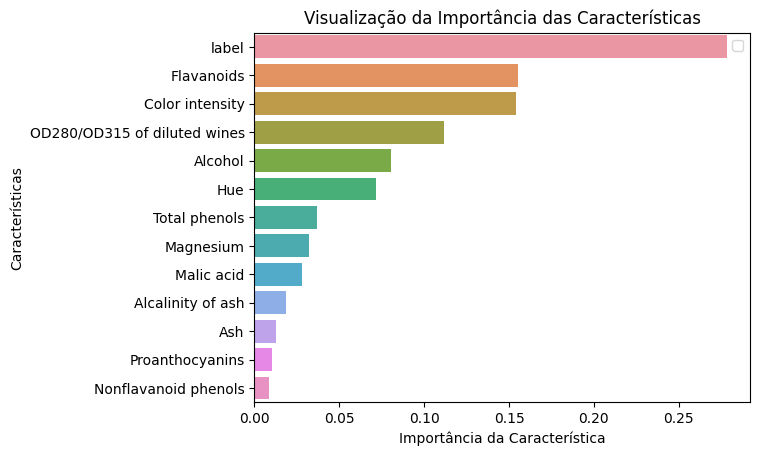

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.legend()
plt.show()

### Questão 4

- Objetivo desta questão será utilizar o algotimo **K-Nearest Neighbors (KNN)** para prever o pior tipo de textura de um tumor. Para isso, será necessário utilizar o dataset **Breast Cancer** da biblioteca Sklearn.

In [170]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)
cancer_data = cancer.frame
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- Pré-processar os dados
- O método describe nos mostra a distancia entre as propriedades de cada elemento da tabela

In [171]:
y = cancer_data['worst texture']
X = cancer_data.drop(['worst texture'], axis = 1)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


- dividindo dados entre treino e teste

In [172]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

- Dimencionando os dados

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- Re-organizando os dados

In [174]:
col_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,426.0,-6.588366e-16,1.001176,-1.821698,-0.681236,-0.241508,0.460925,3.961758
mean texture,426.0,-2.272569e-16,1.001176,-2.245464,-0.714388,-0.120415,0.565256,4.752051
mean perimeter,426.0,-2.731253e-16,1.001176,-1.811055,-0.674847,-0.245100,0.506262,3.979870
mean area,426.0,4.503440e-16,1.001176,-1.360924,-0.655210,-0.306917,0.352451,5.185291
mean smoothness,426.0,2.918896e-16,1.001176,-3.076187,-0.742686,-0.085006,0.624809,4.861839
mean compactness,426.0,-2.981444e-16,1.001176,-1.616996,-0.778996,-0.233459,0.545989,4.063429
mean concavity,426.0,3.440128e-17,1.001176,-1.113998,-0.745012,-0.332025,0.526045,4.321607
mean concave points,426.0,2.668705e-16,1.001176,-1.262519,-0.725055,-0.388166,0.599167,4.057905
mean symmetry,426.0,-1.086246e-15,1.001176,-2.364007,-0.694347,-0.069975,0.573063,4.628217
mean fractal dimension,426.0,-7.729863e-16,1.001176,-1.751926,-0.706044,-0.181718,0.466590,4.825355


- Treinamento

In [175]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [176]:
y_pred = regressor.predict(X_test)
y_pred

array([22.89 , 26.102, 27.51 , 24.384, 23.142, 28.694, 29.318, 24.816,
       24.676, 22.212, 32.036, 26.7  , 24.38 , 26.334, 22.266, 30.164,
       19.276, 24.004, 22.004, 29.954, 27.392, 25.406, 28.708, 26.296,
       27.458, 20.122, 20.17 , 34.144, 23.756, 30.11 , 25.9  , 19.826,
       24.032, 22.996, 22.27 , 23.93 , 31.994, 22.406, 26.45 , 28.986,
       27.258, 30.686, 19.458, 24.226, 21.194, 26.822, 24.158, 30.488,
       22.656, 22.242, 26.704, 31.67 , 26.388, 21.964, 22.68 , 22.612,
       23.408, 29.09 , 28.206, 16.404, 23.756, 26.978, 26.922, 32.678,
       27.404, 27.72 , 29.666, 28.196, 24.822, 20.68 , 31.256, 28.118,
       28.346, 25.888, 23.596, 18.978, 28.1  , 28.822, 20.258, 20.488,
       27.446, 21.614, 30.068, 27.93 , 30.698, 30.512, 32.056, 30.626,
       25.47 , 18.33 , 24.98 , 20.458, 22.12 , 30.388, 26.024, 23.096,
       31.174, 30.474, 19.452, 31.564, 26.748, 18.094, 27.802, 27.064,
       28.508, 24.096, 28.152, 29.358, 22.342, 24.278, 29.302, 21.718,
      

As métricas de regressão mais comumente usadas para avaliar o algoritmo são erro médio absoluto (MAE), erro médio quadrático (MSE), raiz do erro quadrático médio (RMSE) e coeficiente de determinação (R ​​2 )

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 3.0176083916083916
mse: 16.133149230769234
rmse: 4.016609170776917


- Encontrando o melhor K para a regressão KNN

/tmp/ipykernel_9338/4185312011.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6))


Text(0, 0.5, 'Mean Absolute Error')

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

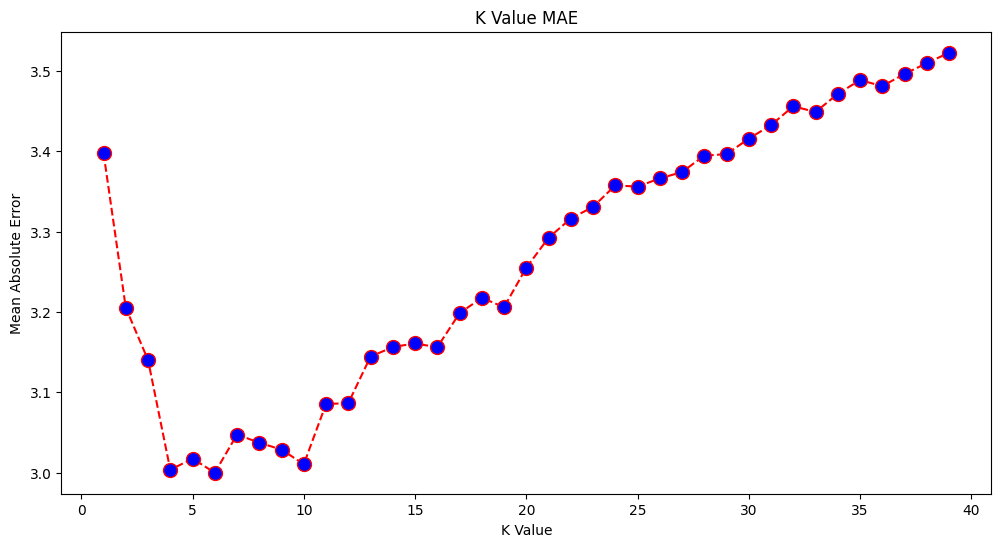

In [178]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, mean_squared_error


error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
    
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')